In [1]:
#Install the library
%%capture
!pip install git+https://github.com/dxc-technology/DXC-Industrialized-AI-Starter.git

In [1]:
from dxc import ai

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported f

Using older than supported version of lightgbm, please upgrade to version greater than 2.2.1


In [2]:
#access the data
df=ai.read_data_frame_from_local_csv()

Saving datasets_42674_74935_Mall_Customers.csv to datasets_42674_74935_Mall_Customers.csv


In [3]:
#Feature selection
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [5]:
## Run ai.Clustering(data) which runs over 3 clustering algorithms to give the best one
alg=ai.Clustering(X)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
X

,Age,Annual Income (k$),Spending Score (1-100),Labels
0,19,15,39,3
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,3
...,...,...,...,...
195,35,120,79,2
196,45,126,28,1
197,32,126,74,2
198,32,137,18,1


In [12]:
X=X.rename_columns({"Annual Income (k$)":"Income","Spending Score (1-100)":"Score"})

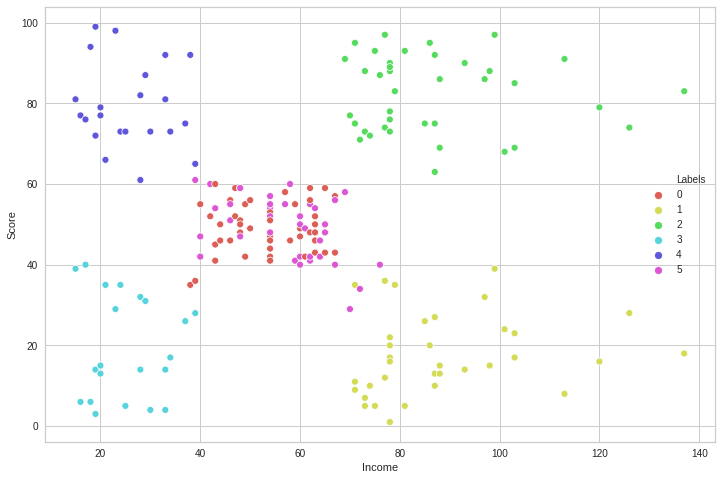

In [15]:
##plot the predicted data
X['Labels'] =alg.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette(
                  'hls', np.unique(alg.labels_).shape[0]))